## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

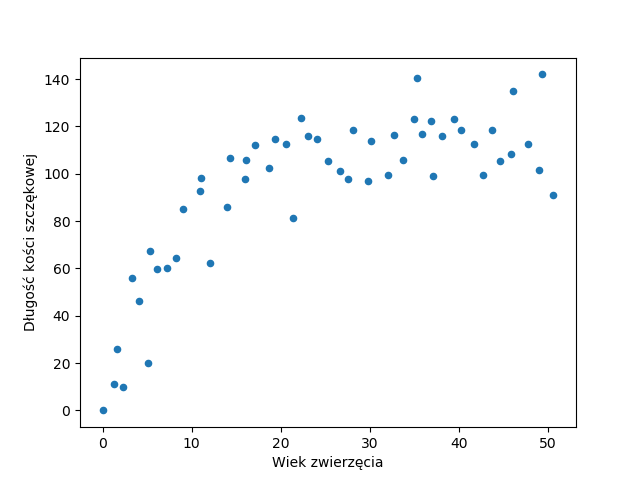

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import time
from typing import Tuple


'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(x: np.ndarray, n: int) -> np.ndarray:
    out = np.column_stack([x**i for i in range(1, n+1)])
    return out



x = np.array([2, 3])
n = 3
print(transform_to_polynomial_feature(x, n))

[[ 2  4  8]
 [ 3  9 27]]


### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

Załadowanie danych z pliku csv

In [386]:
df = pd.read_csv('jaws.csv')
# print(df.head)

X = df['age'].values
y = df['bone'].values

print("Min X:", np.min(X), "Max X:", np.max(X))
print("Min y:", np.min(y), "Max y:", np.max(y))


Min X: 0.0 Max X: 50.60409652
Min y: 0.0 Max y: 142.0


Funkcje normalizująca i przywracająca

In [387]:
def normalize(data: np.array) -> np.array:
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data, data_min, data_max

def denormalize(normalize_data: np.array, data_min: float, data_max: float) -> np.array:
    original_data = normalize_data * (data_max - data_min) + data_min
    return original_data

Zmieniony kod z poprzedniego projektu z regresji liniowej

In [388]:
def calculate_polynomial_regression_function(X: np.array, beta: np.array) -> np.array:
    predict = np.dot(X, beta)
    return predict


def initialize_coefficients(n:int) -> Tuple[np.array, float]:
    beta = np.random.uniform(0,1, n)
    alpha = 0.000001
    
    return beta, alpha

def calculate_error(predictions: np.array, y: np.array) -> float:
    m = len(y)
    diff = predictions - y
    error = np.sum(diff ** 2) / (2 * m)
    return error

def calculate_gradient(predictions: np.ndarray, y: np.ndarray, X: np.ndarray) -> np.ndarray:
    m = len(y)
    return (1/m) * np.dot(X.T, (predictions - y))


def update_regression_coefficients(beta: np.ndarray, grad_beta: np.ndarray, alpha: float) -> np.ndarray:
    return beta - alpha * grad_beta

In [389]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
beta_history: [] - lista z współczynnikami beta w każdej z epok
error_history: [] - lista z błędem w każdej epoce
'''

def learn_and_fit(X: np.ndarray, y: np.ndarray, n: int, alpha: float = 0.00001) -> Tuple[np.ndarray, np.ndarray]:
    beta, _ = initialize_coefficients(n)
    
    beta_history = []
    error_history = []
    
    for epoch in range(500):
        # Debugging: Print at the start of each epoch
        if epoch % 50 == 0:
            print(f"Epoch {epoch}:")
            print(f"  Beta values: {beta}")
        
        predictions = calculate_polynomial_regression_function(X, beta)
        
        error = calculate_error(predictions, y)
        error_history.append(error)
        
        # Debugging: Print error value
        if epoch % 50 == 0:
            print(f"  Error: {error}")
        
        grad_beta = calculate_gradient(predictions, y, X)
        beta = update_regression_coefficients(beta, grad_beta, alpha)
        
        # Debugging: Print updated beta values
        if epoch % 50 == 0:
            print(f"  Updated Beta: {beta}")
        
        beta_history.append(beta)
        
    return np.array(beta_history[-1]).flatten(), error_history



In [390]:
X_normalized, X_min, X_max = normalize(X)
y_normalized, y_min, y_max = normalize(y)

n = 3  

X_poly = transform_to_polynomial_feature(X_normalized, n)

# print(X_poly.shape)  

beta_history, error_history = learn_and_fit(X_poly, y_normalized, n)

predictions_normalized = calculate_polynomial_regression_function(X_poly, beta_history[-1])
predictions = denormalize(predictions_normalized, y_min, y_max)

print("Przewidywane wartości:", predictions[:5])


Epoch 0:
  Beta values: [0.70056371 0.90663924 0.36510152]
  Error: 0.11180428619546497
  Updated Beta: [0.70056218 0.90663767 0.36510005]
Epoch 50:
  Beta values: [0.70048726 0.90656069 0.36502785]
  Error: 0.11176939997174655
  Updated Beta: [0.70048573 0.90655912 0.36502638]
Epoch 100:
  Beta values: [0.70041084 0.90648216 0.3649542 ]
  Error: 0.1117345360157966
  Updated Beta: [0.70040931 0.90648059 0.36495272]
Epoch 150:
  Beta values: [0.70033445 0.90640365 0.36488056]
  Error: 0.11169969431303324
  Updated Beta: [0.70033292 0.90640208 0.36487909]
Epoch 200:
  Beta values: [0.70025808 0.90632517 0.36480695]
  Error: 0.11166487484888418
  Updated Beta: [0.70025656 0.9063236  0.36480548]
Epoch 250:
  Beta values: [0.70018175 0.90624671 0.36473335]
  Error: 0.11163007760878661
  Updated Beta: [0.70018023 0.90624514 0.36473188]
Epoch 300:
  Beta values: [0.70010545 0.90616827 0.36465978]
  Error: 0.11159530257818744
  Updated Beta: [0.70010392 0.90616671 0.36465831]
Epoch 350:
  Beta

### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [391]:
start_time = time.time()

X_poly_original = transform_to_polynomial_feature(X, n)

beta_history_original, error_history_original = learn_and_fit(X_poly_original, y, n)

predictions_original = calculate_polynomial_regression_function(X_poly_original, beta_history_original[-1])
end_time = time.time()
print(f"Czas działąnia dla danych nienormalizowanych: {end_time - start_time:.4f} sekund")

start_time = time.time()
X_poly_normalized = transform_to_polynomial_feature(X_normalized, n)

beta_history_normalized, error_history_normalized = learn_and_fit(X_poly_normalized, y_normalized, n)

predictions_normalized = calculate_polynomial_regression_function(X_poly_normalized, beta_history_normalized[-1])
predictions = denormalize(predictions_normalized, y_min, y_max)

end_time = time.time()
print(f"Czas działąnia dla danych znormalizowanych: {end_time - start_time:.4f} sekund")

print("Przewidywane wartości dla danych oryginanlnych:", predictions_original[:5])
print("Przewidywane wartośći dla danych znormalizowanych:", predictions[:5])

Epoch 0:
  Beta values: [0.05052674 0.0478385  0.74373845]
  Error: 672367096.3859729
  Updated Beta: [-9.71087374e+00 -4.14323841e+02 -1.80890905e+04]
Epoch 50:
  Beta values: [8.42455344e+215 3.57464382e+217 1.56017973e+219]
  Error: inf
  Updated Beta: [-2.05111934e+220 -8.70315694e+221 -3.79855720e+223]
Epoch 100:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 150:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 200:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 250:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 300:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 350:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 400:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Epoch 450:
  Beta values: [nan nan nan]
  Error: nan
  Updated Beta: [nan nan nan]
Czas działąnia dla danych n

C:\Users\barte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\Local\pypoetry\Cache\virtualenvs\polynomial-regression-38280H-m-py3.12\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\barte\AppData\Local\Temp\ipykernel_6956\2045300557.py:15: RuntimeWarning: overflow encountered in square
  error = np.sum(diff ** 2) / (2 * m)


### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

Epoch 0:
  Beta values: [0.88553886]
  Error: 313.91173242768576
  Updated Beta: [0.8782642]
Epoch 50:
  Beta values: [0.58772751]
  Error: 134.64772744221924
  Updated Beta: [0.58296341]
Epoch 100:
  Beta values: [0.3926943]
  Error: 57.765193135705935
  Updated Beta: [0.38957435]
Epoch 150:
  Beta values: [0.26496932]
  Error: 24.791902809678604
  Updated Beta: [0.2629261]
Epoch 200:
  Beta values: [0.18132371]
  Error: 10.65035707719903
  Updated Beta: [0.17998563]
Epoch 250:
  Beta values: [0.12654517]
  Error: 4.585347679396985
  Updated Beta: [0.12566888]
Epoch 300:
  Beta values: [0.09067134]
  Error: 1.9841936265594202
  Updated Beta: [0.09009747]
Epoch 350:
  Beta values: [0.06717799]
  Error: 0.8686137547383934
  Updated Beta: [0.06680216]
Epoch 400:
  Beta values: [0.05179246]
  Error: 0.3901651795551638
  Updated Beta: [0.05154634]
Epoch 450:
  Beta values: [0.04171666]
  Error: 0.1849687208549962
  Updated Beta: [0.04155548]
Epoch 0:
  Beta values: [0.50871673 0.89213379 0

C:\Users\barte\AppData\Local\Temp\ipykernel_6956\2045300557.py:15: RuntimeWarning: overflow encountered in square
  error = np.sum(diff ** 2) / (2 * m)


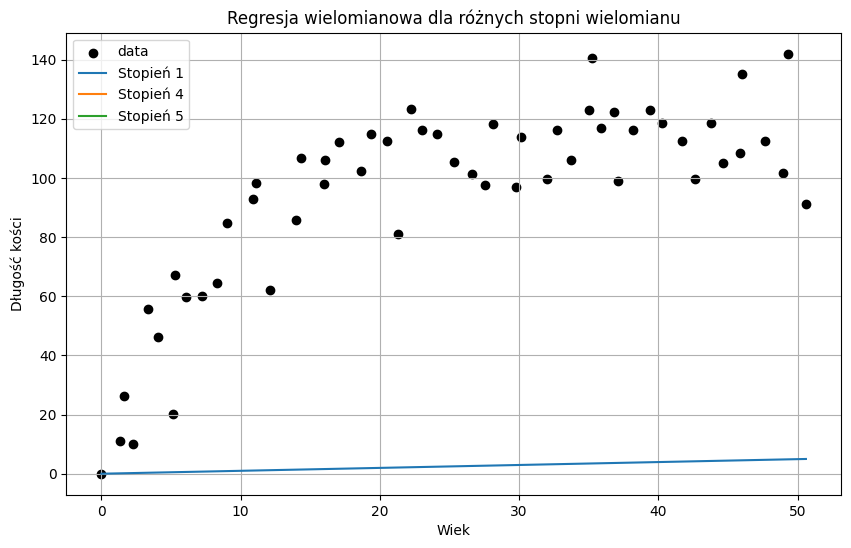

In [392]:
n_values = [1, 4, 5]
X_poly_dict = {n: transform_to_polynomial_feature(X, n) for n in n_values}

# Beta dictionary contains the coefficients for each polynomial degree
beta_dict = {n: learn_and_fit(X_poly, y_normalized, n)[0] for n, X_poly in X_poly_dict.items()}

# Debugging: Checking the size of the beta vectors
for n in n_values:
    print(f"Rozmiar beta_dict[{n}]: {beta_dict[n].shape}")

# Generate predictions from the polynomial features
predictions_dict = {n: np.dot(X_poly_dict[n], beta_dict[n]) for n in n_values}

# Denormalize predictions to get them back in original y-space
predictions_denormalized_dict = {n: denormalize(predictions_dict[n], y_min, y_max) for n in n_values}

# Check values of predictions
for n in n_values:
    print(f"Predictions for degree {n}: {predictions_denormalized_dict[n]}")

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.scatter(X, y, color='black', label='data')

# Prepare the x_range for plotting predictions
x_range = np.linspace(np.min(X), np.max(X), 54)  # Same number of points as your data

# Normalize the x_range using the same normalization function used for X
x_range_normalized, _, _ = normalize(x_range)

# Plotting regression lines for each polynomial degree
for n in n_values:
    # Generate polynomial features for the x_range
    X_poly_range = transform_to_polynomial_feature(x_range_normalized, n)
    print(f"Rozmiar X_poly_range: {X_poly_range.shape}")  # Debugging
    
    # Make predictions for the x_range
    predictions_range = np.dot(X_poly_range, beta_dict[n])
    
    # Denormalize predictions
    predictions_denormalized_range = denormalize(predictions_range, y_min, y_max)
    print(f"Rozmiar predictions_denormalized_range: {predictions_denormalized_range.shape}")  # Debugging
    
    # Check the values of predictions_denormalized_range
    print(f"Predictions Denormalized for degree {n}: {predictions_denormalized_range[:10]}")  # Debugging first few values
    
    # Plot the regression line
    plt.plot(x_range, predictions_denormalized_range, label=f"Stopień {n}")

# Finalize the plot
plt.title('Regresja wielomianowa dla różnych stopni wielomianu')
plt.xlabel('Wiek')
plt.ylabel('Długość kości')
plt.legend()
plt.grid(True)
plt.show()


### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

In [393]:
# YOUR CODE HERE

### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [394]:
#YOUR CODE HERE